In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
a='HYDERABAD'
b='MUMBAI'
c='DELHI'


In [3]:
name1=a+'-'+b+'.csv'
df1=pd.read_csv(name1)

name2=b+'-'+a+'.csv'
df2=pd.read_csv(name2)

name3=a+'-'+c+'.csv'
df3=pd.read_csv(name3)

name4=c+'-'+a+'.csv'
df4=pd.read_csv(name4)

name5=b+'-'+c+'.csv'
df5=pd.read_csv(name5)

name6=c+'-'+b+'.csv'
df6=pd.read_csv(name6)

df=pd.concat([df, df1,df2,df3,df4,df5,df6], ignore_index=True)


In [4]:
df

,Unnamed: 0,company_name,flight_duration,price,departure_date,arrival_date,co2_emission,stops,days_left,Date,Source city,Destination city
0,0,IndiGo,1 hr 30 min,"₹3,613",5:45 AM,7:15 AM,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI
1,1,Air India,1 hr 30 min,"₹3,904",1:20 PM,2:50 PM,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI
2,2,Akasa Air,1 hr 45 min,"₹4,020",11:45 AM,1:30 PM,61 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI
3,3,IndiGo,1 hr 25 min,"₹3,746",6:50 AM,8:15 AM,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI
4,4,Air India,1 hr 35 min,"₹3,904",8:20 AM,9:55 AM,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI
...,...,...,...,...,...,...,...,...,...,...,...,...
218189,63150,Etihad,10 hr 30 min,"₹26,072",9:15 PM,7:45 AM+1,358 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI
218190,63151,THAI,18 hr 35 min,"₹30,383",3:20 AM,9:55 PM,559 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI
218191,63152,THAI,10 hr 15 min,"₹30,383",11:40 AM,9:55 PM,528 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI
218192,63153,Etihad,8 hr,"₹34,640",4:50 AM,12:50 PM,425 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

<Axes: >

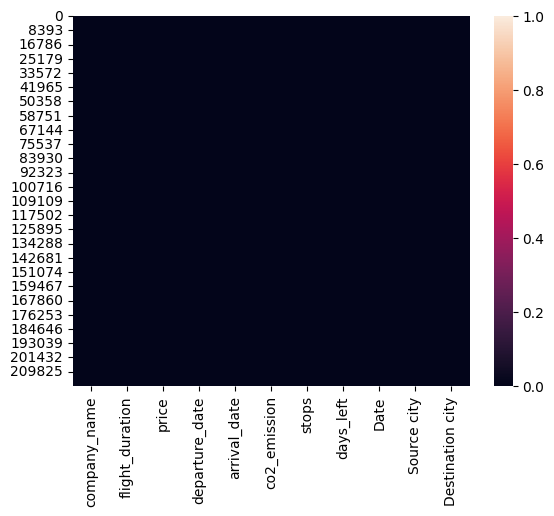

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

In [7]:
def convert_to_minutes(duration):
    parts = duration.split(' ')
    hours = int(parts[0]) 
    minutes=0 # Extract hours
    if len(parts)>2:
        minutes = int(parts[2])  # Extract minutes
    return (hours * 60) + minutes


In [8]:
df['flight_duration']=df['flight_duration'].astype('string')
df['duration'] = df['flight_duration'].apply(convert_to_minutes)
df.drop(['flight_duration'],axis=1,inplace=True)


In [9]:
df['price']=df['price'].astype('string')

In [10]:
import numpy as np
def convert_price(price):
    try:
        # Remove ₹ symbol and commas, then convert to float
        return float(price.replace('₹', '').replace(',', '').strip())
    except:
        # If conversion fails (like 'Price unavailable'), return NaN
        return np.nan

In [11]:
df['price'] = df['price'].apply(convert_price)

In [12]:
df

,company_name,price,departure_date,arrival_date,co2_emission,stops,days_left,Date,Source city,Destination city,duration
0,IndiGo,3613.0,5:45 AM,7:15 AM,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
1,Air India,3904.0,1:20 PM,2:50 PM,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
2,Akasa Air,4020.0,11:45 AM,1:30 PM,61 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,105
3,IndiGo,3746.0,6:50 AM,8:15 AM,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,85
4,Air India,3904.0,8:20 AM,9:55 AM,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,95
...,...,...,...,...,...,...,...,...,...,...,...
218189,Etihad,26072.0,9:15 PM,7:45 AM+1,358 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,630
218190,THAI,30383.0,3:20 AM,9:55 PM,559 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,1115
218191,THAI,30383.0,11:40 AM,9:55 PM,528 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,615
218192,Etihad,34640.0,4:50 AM,12:50 PM,425 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,480


In [13]:
df.drop(['arrival_date'],axis=1,inplace=True)
df.rename(columns={'departure_date': 'departure_time'},inplace=True)

In [15]:
df['departure_time'] = df['departure_time'].astype('string')
df.dtypes

company_name                object
price                      float64
departure_time      string[python]
co2_emission                object
stops                       object
days_left                    int64
Date                        object
Source city                 object
Destination city            object
duration                     int64
dtype: object

In [16]:
from datetime import datetime


# Function to convert time with AM/PM into datetime format
def convert_time_to_datetime(time_str):
    # Use the strptime function to parse the time format '%I:%M %p' (12-hour format with AM/PM)
    return datetime.strptime(time_str, '%I:%M %p')

In [17]:
df['departure_time'] = df['departure_time'].apply(convert_time_to_datetime)

In [18]:
df.dtypes

company_name                object
price                      float64
departure_time      datetime64[ns]
co2_emission                object
stops                       object
days_left                    int64
Date                        object
Source city                 object
Destination city            object
duration                     int64
dtype: object

In [20]:
df['departure_time'] = df['departure_time'].dt.time

In [21]:
df

,company_name,price,departure_time,co2_emission,stops,days_left,Date,Source city,Destination city,duration
0,IndiGo,3613.0,05:45:00,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
1,Air India,3904.0,13:20:00,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
2,Akasa Air,4020.0,11:45:00,61 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,105
3,IndiGo,3746.0,06:50:00,62 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,85
4,Air India,3904.0,08:20:00,68 kg CO2e,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,95
...,...,...,...,...,...,...,...,...,...,...
218189,Etihad,26072.0,21:15:00,358 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,630
218190,THAI,30383.0,03:20:00,559 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,1115
218191,THAI,30383.0,11:40:00,528 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,615
218192,Etihad,34640.0,04:50:00,425 kg CO2e,1 stop,28,2024-09-24,DELHI,MUMBAI,480


In [23]:
df['co2_emission'] = df['co2_emission'].str.extract('(\d+)')

# Convert to float first to handle NaN, then convert to integers where possible
df['co2_emission'] = pd.to_numeric(df['co2_emission'], errors='coerce').fillna(0).astype(int)


In [35]:
df['departure_time'] = df['departure_time'].dt.time

In [39]:
df.dtypes

company_name         object
price               float64
departure_time       object
co2_emission          int64
stops                object
days_left             int64
Date                 object
Source city          object
Destination city     object
duration              int64
dtype: object

In [40]:
df.head()

,company_name,price,departure_time,co2_emission,stops,days_left,Date,Source city,Destination city,duration
0,IndiGo,3613.0,05:45:00,62,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
1,Air India,3904.0,13:20:00,68,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,90
2,Akasa Air,4020.0,11:45:00,61,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,105
3,IndiGo,3746.0,06:50:00,62,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,85
4,Air India,3904.0,08:20:00,68,Nonstop,1,2024-09-05,HYDERABAD,MUMBAI,95


In [41]:
def convert_stops(value):
    if 'Nonstop' in value:
        return 0
    else:
        return int(value.split()[0])  

In [42]:
df['stops'] = df['stops'].apply(convert_stops)

In [46]:
df['stops'].value_counts()

stops
0    113765
1    103950
2       479
Name: count, dtype: int64

In [48]:
df.dtypes

company_name         object
price               float64
departure_time       object
co2_emission          int64
stops                 int64
days_left             int64
Date                 object
Source city          object
Destination city     object
duration              int64
dtype: object

In [49]:
df.rename(columns={'Source city': 'Source_city', 'Destination city':'Destination_city'}, inplace=True)

In [56]:
df = pd.get_dummies(df, columns=['Source_city', 'Destination_city'])

In [64]:
df = df.dropna(subset=['price'])

In [65]:
df.isnull().sum()

company_name                  0
price                         0
departure_time                0
co2_emission                  0
stops                         0
days_left                     0
Date                          0
duration                      0
Source_city_DELHI             0
Source_city_HYDERABAD         0
Source_city_MUMBAI            0
Destination_city_DELHI        0
Destination_city_HYDERABAD    0
Destination_city_MUMBAI       0
dtype: int64

In [66]:
df

,company_name,price,departure_time,co2_emission,stops,days_left,Date,duration,Source_city_DELHI,Source_city_HYDERABAD,Source_city_MUMBAI,Destination_city_DELHI,Destination_city_HYDERABAD,Destination_city_MUMBAI
0,IndiGo,3613.0,05:45:00,62,0,1,2024-09-05,90,False,True,False,False,False,True
1,Air India,3904.0,13:20:00,68,0,1,2024-09-05,90,False,True,False,False,False,True
2,Akasa Air,4020.0,11:45:00,61,0,1,2024-09-05,105,False,True,False,False,False,True
3,IndiGo,3746.0,06:50:00,62,0,1,2024-09-05,85,False,True,False,False,False,True
4,Air India,3904.0,08:20:00,68,0,1,2024-09-05,95,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218189,Etihad,26072.0,21:15:00,358,1,28,2024-09-24,630,True,False,False,False,False,True
218190,THAI,30383.0,03:20:00,559,1,28,2024-09-24,1115,True,False,False,False,False,True
218191,THAI,30383.0,11:40:00,528,1,28,2024-09-24,615,True,False,False,False,False,True
218192,Etihad,34640.0,04:50:00,425,1,28,2024-09-24,480,True,False,False,False,False,True


In [68]:
df['company_name'].value_counts()

company_name
IndiGo                                                                          87829
VistaraAir India                                                                30359
Air India                                                                       25784
Etihad                                                                          11908
Emirates                                                                        10337
SpiceJet                                                                         9255
IndiGoOperated by Operated Under Wet Lease From Smartlynx                        7819
Akasa Air                                                                        6639
SriLankan                                                                        4442
THAI                                                                             3565
Oman Air                                                                         2213
flydubai, Emirates                       

In [73]:
df = pd.get_dummies(df, columns=['company_name'])

In [74]:
df

,price,departure_time,co2_emission,stops,days_left,Date,duration,Source_city_DELHI,Source_city_HYDERABAD,Source_city_MUMBAI,...,company_name_Saudia,company_name_Singapore Airlines,company_name_SpiceJet,company_name_SriLankan,company_name_THAI,company_name_Vietnam Airlines,company_name_Vistara,company_name_VistaraAir India,company_name_flydubai,"company_name_flydubai, Emirates"
0,3613.0,05:45:00,62,0,1,2024-09-05,90,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,3904.0,13:20:00,68,0,1,2024-09-05,90,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,4020.0,11:45:00,61,0,1,2024-09-05,105,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3746.0,06:50:00,62,0,1,2024-09-05,85,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,3904.0,08:20:00,68,0,1,2024-09-05,95,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218189,26072.0,21:15:00,358,1,28,2024-09-24,630,True,False,False,...,False,False,False,False,False,False,False,False,False,False
218190,30383.0,03:20:00,559,1,28,2024-09-24,1115,True,False,False,...,False,False,False,False,True,False,False,False,False,False
218191,30383.0,11:40:00,528,1,28,2024-09-24,615,True,False,False,...,False,False,False,False,True,False,False,False,False,False
218192,34640.0,04:50:00,425,1,28,2024-09-24,480,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df.dtypes

price                                                                                        float64
departure_time                                                                                object
co2_emission                                                                                   int64
stops                                                                                          int64
days_left                                                                                      int64
Date                                                                                          object
duration                                                                                       int64
Source_city_DELHI                                                                               bool
Source_city_HYDERABAD                                                                           bool
Source_city_MUMBAI                                                                         

In [76]:
df.to_csv('data.csv', index=False)